# Exercise

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# #1

In [2]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=500, centers=3,
                       cluster_std=3, random_state=42)

#apply K means library from sklearn with n_clusters=4, and plot a scatter plot with colors based on their grouping
#also plot the centers using cluster_centers_

# #2

In [3]:
#apply ridge regression with degrees, 1 to 5 and plot using these x and f(x)
#print their r^2 on the graph
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

x = np.linspace(0, 10, 30)
X = x[:, np.newaxis]
y = x**2 * np.cos(x) + 105

# #3

In [4]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

iris = datasets.load_iris()
X = iris.data[:, :2]  #so this can be nicely plot using x1 and x2
y = iris.target  #a reminder that there are 3 classes, e.g., Versicolor

#predit using LogisticRegression
#to add some flavor, learn how to plot the decision boundary using plt.pcolormesh
#in order to generate Z for input to plt.pcolormesh, use np.meshgrid which will generate all possible x and y

# #4

In [5]:
#this one is simple, seaborn has a very useful pairplot function
#first understand why pairplot is useful - write one or two short sentences
#then attempt to apply pairplot with the iris dataset
#reminder to check what pairplot accepts, so you can prepare the data in that correct format
#you may also want to read what sklearn return for dataset

# #5

In [6]:
#Make a scatter plot with histograms above and right of the scatter plot
#along with the cdf curve (Hint: use hist-type(step))
#Next, find the correlation and p-value using pearson correlation, and print the results on the graph

# #6

In [7]:
#Boxplot is commonly used in academic settings due to its compact format but with abundant information
#Attempt to create a boxplot of total_bills by days based on this dataset
#to add some challenge, attempt to add a scatterplot on top of the boxplot
import seaborn as sns
df = sns.load_dataset('tips')  #return pd dataframe

# #7

In [8]:
#Common task is to initially compare machine learning algorithms as a spot checking process before fine-tuning hypteramaters
#Here we gonna use boxplot to compare the algorithms based on accuracy
#Note that there are many metrics you can use to compare algorithms, and not only accuracy that matters, e.g., time, learning curves, etc.
#Also note that it is silly to consider this result done.  This is simply an exploratory process to check which model is viable, before fine-tuning

import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# load dataset
digits = datasets.load_digits()

#perform classification based on what we have imported
#then plot the results using boxplot

# #8

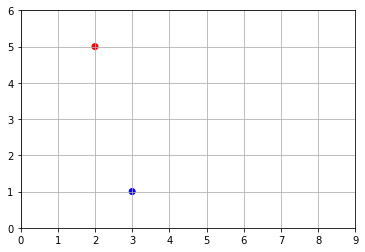

In [9]:
#Here is the simple 2D vectors

u = np.array([2, 5])
v = np.array([3, 1])

x_coords, y_coords = zip(u, v)
plt.scatter(x_coords, y_coords, color=["r","b"])
plt.axis([0, 9, 0, 6])
plt.grid()
plt.show()

#represent these vectors as arrows

# #9

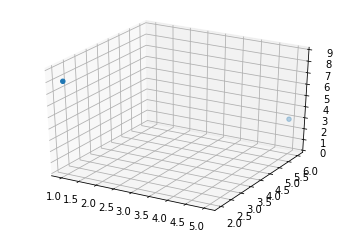

In [18]:
#Here are simple 3D vectors

a = np.array([1, 2, 8])
b = np.array([5, 6, 3])

from mpl_toolkits.mplot3d import Axes3D

subplot3d = plt.subplot(111, projection='3d')
x_coords, y_coords, z_coords = zip(a,b)
subplot3d.scatter(x_coords, y_coords, z_coords)
subplot3d.set_zlim3d([0, 9])
plt.show()

#attempt to plot the 3d vectors

# Solution

# #1

Simple plot


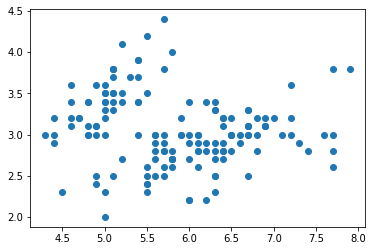

Plot applying kmeans


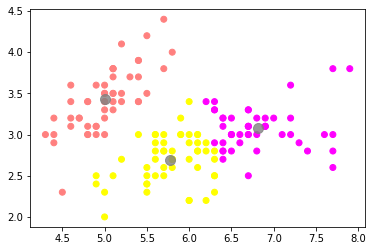

In [10]:
#let's make a simple plot first
print("Simple plot")
plt.scatter(X[:, 0], X[:, 1])
plt.show()  #if it is not the last command, use plt.show() to explicitly show the diagram

#let's do some kmean clustering (I did not teach yet what is this, but basically is a unsupervised
#algorithm for perform clustering (grouping))
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_  #return x y coordinates of n_clusters center. (here the shape is 3 , 2)

print("Plot applying kmeans")
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='spring')
plt.scatter(centers[:, 0], centers[:, 1], c='gray', s=100, alpha=0.8);

# #2

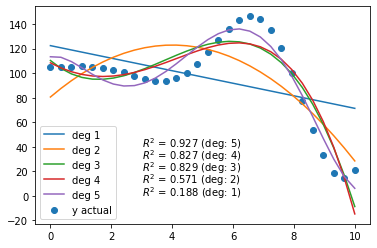

In [11]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

x = np.linspace(0, 10, 30)
X = x[:, np.newaxis]
y = x**2 * np.cos(x) + 105

plt.scatter(x, y, label="y actual")

for ix, deg in enumerate([1, 2, 3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(deg), Ridge())
    model.fit(X, y)
    y_preds = model.predict(X)
    plt.text(3, ix*10, f"$R^2$ = {model.score(X, y):.3f} (deg: {deg}) ")
    plt.plot(x, y_preds,label="deg %d" % deg)

plt.legend()

# #3

Text(0.5, 1.0, 'Logistic regression on iris dataset')

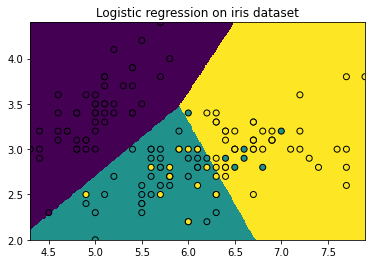

In [12]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

iris = datasets.load_iris()
X = iris.data[:, :2]  #so this can be nicely plot using x1 and x2
y = iris.target  #a reminder that there are 3 classes, e.g., Versicolor

model = LogisticRegression().fit(X, y)

x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),  #0.01 indicates the resolution of how precise is our coloring
                     np.arange(y_min, y_max, 0.01))

# first ravel into a list of x and y coordinates, then use column_stack to pair all x and y, then predict
Z = model.predict(np.column_stack((xx.ravel(), yy.ravel())))
Z = Z.reshape(xx.shape)  #put this back into xx shape
plt.pcolormesh(xx, yy, Z, cmap="viridis")  #use pcolormesh to plot the colormesh

#plot the actual points, with color specifying the actual y class
plt.scatter(X[:, 0], X[:, 1], c=y,
            edgecolor='black', cmap="viridis")
plt.title("Logistic regression on iris dataset")

# #4

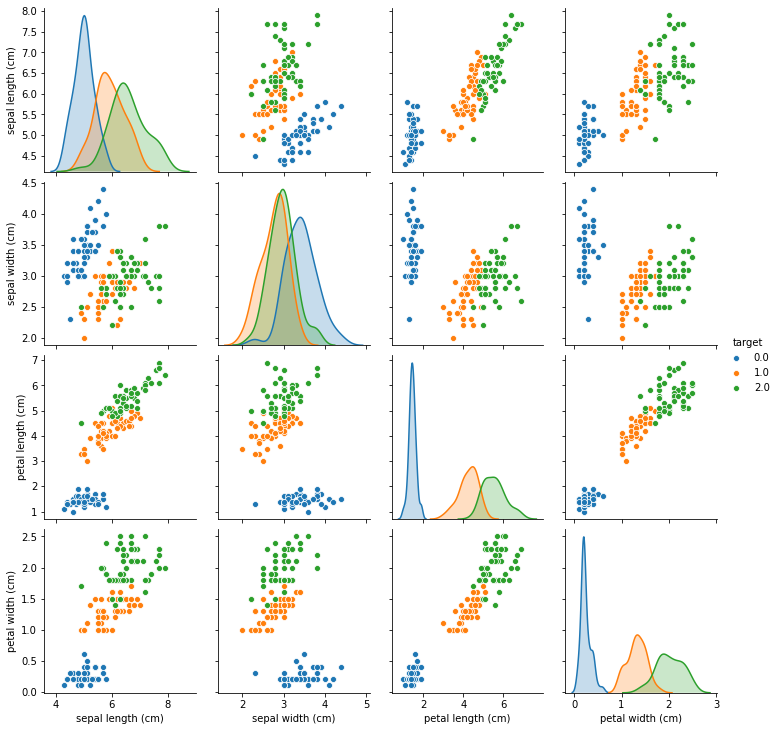

In [13]:
import seaborn as sns
sklearn_dataset_to_pandas = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
sns.pairplot(sklearn_dataset_to_pandas, kind="scatter", hue="target")


#pairplot is useful to examine relationships, before actually drilling to the data
#it is probably a golden rule, i.e., visualization and understanding the data will greatly increase 
#the chance of your success in applying ML.

#for example, we can see thaat speal length, petal length, and petal width have a clear distinct distribution
#with targets, indicating a good choice for features (X)

# #5

Text(0.5, 0, 'cdf')

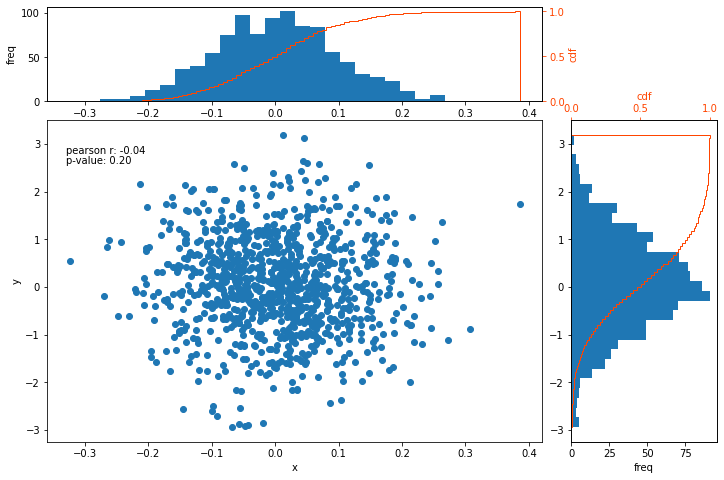

In [14]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import numpy as np

mu, sigma = 0, 0.1 # mean and standard deviation
np.random.seed(42)
x = np.random.normal(mu, sigma, 1000)
y = np.random.randn(1000)

#pearson correlation
from scipy import stats
r, p = stats.pearsonr(x, y)

fig = plt.figure(figsize=(12,8))
grid = gs.GridSpec(4, 4)
main = plt.subplot(grid[1:4, :3])
tophist = plt.subplot(grid[0, :3], sharex=main)
righthist = plt.subplot(grid[1:4, 3:], sharey=main)

#main plot
main.scatter(x, y, marker='o')
main.set_xlabel("x")
main.set_ylabel("y")
main.text(-0.33, 2.8, f"pearson r: {r:.2f}")
main.text(-0.33, 2.6, f"p-value: {p:.2f}")

color='orangered'

#top plot
tophist.hist(x, bins=30)
tophist.set_ylabel('freq')
#https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/two_scales.html
topcdf = tophist.twinx()  #create new axes but share the same x axis
topcdf.hist(x,bins=100,cumulative=True,histtype='step',density=True,color=color)
#normalized hist using density set to True
topcdf.tick_params(axis='y', colors=color)
topcdf.set_ylabel('cdf',color=color)

#right plot
righthist.hist(y,bins=30,orientation='horizontal')
righthist.set_xlabel('freq')
rightcdf = righthist.twiny()  #create new axes but share the same y axis
#normalized hist using density set to True
rightcdf.hist(y,bins=100,cumulative=True,histtype='step',density=True,color=color,orientation='horizontal')
rightcdf.tick_params(axis='x', colors=color)
rightcdf.set_xlabel('cdf',color=color)

# #6

{'Fri', 'Thur', 'Sun', 'Sat'}


Text(0, 0.5, 'Total Bill')

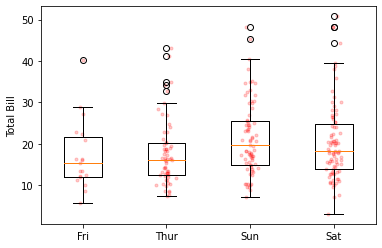

In [15]:
import seaborn as sns
df = sns.load_dataset('tips')  #return pd dataframe
days = set(df['day']) 
print(days)  #possible days

dfs = []  #list of dataframe
for ix, day in enumerate(days):
    day_df = df.loc[df['day'] == day, 'total_bill']  #shape (n_samples, )
    #for boxplot later
    dfs.append(day_df)
    #plotting each scatterplot
    #adding some random jitter for nice plot
    x = np.random.normal(ix+1, 0.04, size=len(day_df))  #Sat = 1, Fri = 2, Sun = 3, Thur = 4
    plt.plot(x, day_df, 'r.', alpha=0.2)
    
plt.boxplot(dfs, labels=days)  #list of (n_samples)
plt.ylabel("Total Bill")

# #7

LR: 0.938218 (0.031545)
LDA: 0.915403 (0.028372)
KNN: 0.960493 (0.023234)
DT: 0.834699 (0.038296)
NB: 0.759066 (0.055416)
SVM: 0.967148 (0.016632)


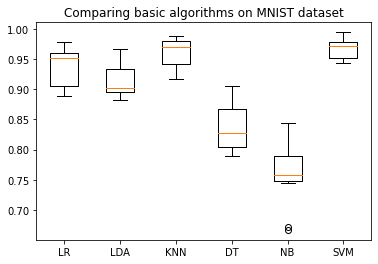

In [16]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# load dataset
digits = datasets.load_digits()

#most distanced based algorithms benefit from normalizing with mean 0 and unit std
scaler = StandardScaler()
X = scaler.fit(digits.data).transform(digits.data)
y = digits.target

# print(X.shape)  #verify is (n_samples, n_features)
# print(y.shape)  #verify is (n_samples, )
# print("Possible y: ", set(y))  #possible y

# prepare models; I have put into a list so I can easily loop them
models = []
models.append(('LR', LogisticRegression(multi_class="multinomial",
                                       max_iter=500)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:  #e.g., name = LR, model = LogisticRegression()
    kfold = model_selection.KFold(n_splits=10, random_state=None)
    #list of 10 results doing cross validation for each model
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
plt.boxplot(results, labels=names)
plt.title("Comparing basic algorithms on MNIST dataset")
plt.show()

# #8

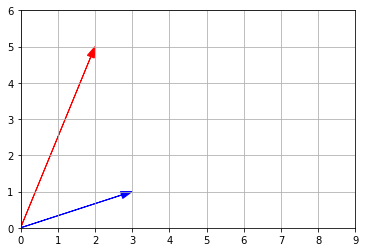

In [17]:
def plot_vector2d(vector2d, origin=[0, 0], **options):
    return plt.arrow(origin[0], origin[1], vector2d[0], vector2d[1],
              head_width=0.2, head_length=0.3, length_includes_head=True,
              **options)

plot_vector2d(u, color="r")
plot_vector2d(v, color="b")
plt.axis([0, 9, 0, 6])
plt.grid()
plt.show()

# #9

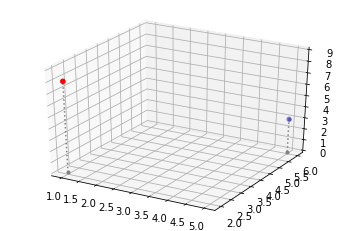

In [19]:
a = np.array([1, 2, 8])
b = np.array([5, 6, 3])

def plot_vectors3d(ax, vectors3d, z0, **options):
    for v in vectors3d:
        x, y, z = v
        ax.plot([x,x], [y,y], [z0, z], color="gray", linestyle='dotted', marker=".")
    x_coords, y_coords, z_coords = zip(*vectors3d)
    ax.scatter(x_coords, y_coords, z_coords, **options)

subplot3d = plt.subplot(111, projection='3d')
subplot3d.set_zlim([0, 9])
plot_vectors3d(subplot3d, [a,b], 0, color=("r","b"))
plt.show()